In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../python_tools/')
from tools import *
from tools_native import *
from tools_mapping import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
#on grid cell
#highirr
Cendrosa_lon=0.755
Cendrosa_lat=41.63
#lowirr
ElsPlans_lon=0.996
ElsPlans_lat=41.51

# alt for these grid cells : (307.6005859375, 456.8945007324219)

In [20]:
#actual data from LIAISE db
Cendrosa_Latitude=41.69336
Cendrosa_Longitude=0.928538
Cendrosa_altitude= 240

ElsPlans_Latitude = 41.590111
ElsPlans_Longitude = 1.029363
ElsPlans_altitude = 334

In [21]:
def add_liaise_site_loc(ax=None):
    if ax is not None:
        ax.plot(Cendrosa_lon, Cendrosa_lat, 'go', markersize=10, transform=ccrs.Geodetic())
        ax.plot(ElsPlans_lon, ElsPlans_lat, 'go', markersize=10, transform=ccrs.Geodetic())
        ax.plot(Cendrosa_Longitude, Cendrosa_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())
        ax.plot(ElsPlans_Longitude, ElsPlans_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())
    else:
        plt.plot(Cendrosa_lon, Cendrosa_lat, 'go', markersize=10, transform=ccrs.Geodetic())
        plt.plot(ElsPlans_lon, ElsPlans_lat, 'go', markersize=10, transform=ccrs.Geodetic())
        plt.plot(Cendrosa_Longitude, Cendrosa_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())
        plt.plot(ElsPlans_Longitude, ElsPlans_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())

# Restarts

In [ ]:
# restart_filename='../../data/modif_ORCmaps/sim258_20210630_sechiba_rest_original.nc'
# restart_new_filename='../../data/modif_ORCmaps/restarts/sim258_20210630_sechiba_rest_new.nc'

restart_filename='../../data/modif_ORCmaps/sim248_20210630_sechiba_rest_original.nc'
restart_new_filename='../../data/modif_ORCmaps/restarts/sim248_20210630_sechiba_rest_new.nc'

restart=xr.open_dataset(restart_filename, decode_times=False)

restart

<xarray.Dataset>
Dimensions:           (y: 9241, x: 1, z: 1, time: 1, z_a: 15, z_b: 11, z_c: 3,
                       z_d: 2, z_e: 18, z_f: 17)
Coordinates:
  * time              (time) float32 2.05e+08
Dimensions without coordinates: y, x, z, z_a, z_b, z_c, z_d, z_e, z_f
Data variables: (12/124)
    nav_lon           (y, x) float32 ...
    nav_lat           (y, x) float32 ...
    nav_lev           (z) float32 ...
    time_steps        (time) int32 ...
    njsc_usda         (time, y, x) float64 ...
    ks                (time, y, x) float64 ...
    ...                ...
    coastalflow       (time, y, x) float64 ...
    hydrographs       (time, y, x) float64 ...
    lakeres           (time, y, x) float64 ...
    humrel_lake       (time, y, x) float64 ...
    riverflow_cpl0    (time, y, x) float64 ...
    coastalflow_cpl0  (time, y, x) float64 ...
Attributes:
    Conventions:  CF-1.1
    file_name:    sechiba_rest_out.nc
    TimeStamp:    2024-OCT-31 05:22:07 GMT+0100

In [10]:
def locate_grid_cell(ds, lon, lat):
    """Edit the grid cell closest to the given lon/lat with new values."""
    dist = haversine(ds.nav_lat, ds.nav_lon, lat, lon)
    closest_idx = dist.argmin(...)
    print(closest_idx)

def locate_grid_cell_var(ds, varname, value):
    dist = np.abs(ds[varname]-value)
    closest_idx = dist.argmin()
    print(closest_idx)

In [24]:
var='irrigmap_dyn'
value=326599456.0
locate_grid_cell_var(restart, var, value)
value=95288328.0
locate_grid_cell_var(restart, var, value)

KeyError: 'irrigmap_dyn'

In [12]:
cen_idx=2877
els_idx=2823

# cen_idx=2807
# els_idx=2802

In [ ]:
for i in range(15):
    restart['veget_max'][0,i,cen_idx,0]=0.0
    restart['veget_max'][0,i,els_idx,0]=0.0
restart['veget_max'][0,11,cen_idx,0]=1.0
restart['veget_max'][0,11,els_idx,0]=1.0

# restart['irrigmap_dyn'][0,cen_idx,0]=5e+8
# restart['irrigmap_dyn'][0,els_idx,0]=0.0

#export to netcdf
if os.path.exists(restart_new_filename):
    print('Removing existing file')
    os.remove(restart_new_filename)
restart.to_netcdf(restart_new_filename)

restart2=xr.open_dataset(restart_new_filename, decode_times=False)
restart2

<xarray.Dataset>
Dimensions:           (y: 9241, x: 1, z: 1, time: 1, z_a: 15, z_b: 11, z_c: 3,
                       z_d: 2, z_e: 18, z_f: 17)
Coordinates:
  * time              (time) float32 2.05e+08
Dimensions without coordinates: y, x, z, z_a, z_b, z_c, z_d, z_e, z_f
Data variables: (12/124)
    nav_lon           (y, x) float32 ...
    nav_lat           (y, x) float32 ...
    nav_lev           (z) float32 ...
    time_steps        (time) int32 ...
    njsc_usda         (time, y, x) float64 ...
    ks                (time, y, x) float64 ...
    ...                ...
    coastalflow       (time, y, x) float64 ...
    hydrographs       (time, y, x) float64 ...
    lakeres           (time, y, x) float64 ...
    humrel_lake       (time, y, x) float64 ...
    riverflow_cpl0    (time, y, x) float64 ...
    coastalflow_cpl0  (time, y, x) float64 ...
Attributes:
    Conventions:  CF-1.1
    file_name:    sechiba_rest_out.nc
    TimeStamp:    2024-OCT-31 05:22:07 GMT+0100

In [32]:
ds=restart2
print("Lon, lat")
print(ds['nav_lon'][cen_idx,0].values)
print(ds['nav_lat'][cen_idx,0].values)
# print("aei_sw, irrigmap_dyn")
# print(ds['fraction_aeirrig_sw'][:,cen_idx,0].values)
# print(ds['irrigmap_dyn'][:,cen_idx,:].values)
print("veget_max")
for i in range(15):
    print(ds['veget_max'][:,i,cen_idx,:].values)

Lon, lat
3.3783185
42.78703
veget_max
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]


In [34]:
ds=restart2
print("Lon, lat")
print(ds['nav_lon'][els_idx,0].values)
print(ds['nav_lat'][els_idx,0].values)
# print("aei_sw, irrigmap_dyn")
# print(ds['fraction_aeirrig_sw'][:,els_idx,0].values)
# print(ds['irrigmap_dyn'][:,els_idx,:].values)
print("veget_max")
for i in range(15):
    print(ds['veget_max'][:,i,els_idx,:].values)

Lon, lat
0.5271107
41.954994
veget_max
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]


# Modify PFTmap

In [ ]:
# filename='/data/ptiengou/PFTmap_2014.nc'
filename='../../data/modif_ORCmaps/PFTmap_2014.nc'
map0=xr.open_dataset(filename, decode_times=False)
#select subset
# map=map0.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max,lat_min))
map=map0
#rename time
map=map.rename({'time_counter':'time'})
#add var or pft12
# map['pft12'] = map['maxvegetfrac'][0,11,:,:]

map

<xarray.Dataset>
Dimensions:       (lat: 1800, lon: 3600, time: 1, veget: 15)
Coordinates:
  * lat           (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon           (lon) float32 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
  * time          (time) float32 0.0
  * veget         (veget) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    maxvegetfrac  (time, veget, lat, lon) float32 ...
Attributes: (12/19)
    description:  ORCHIDEE PFT map derived from ESACCI Land Cover map v2.0.7b...
    PFT1:         bare soil
    PFT2:         tropical broadleaf evergreen
    PFT3:         tropical broadleaf raingreen
    PFT4:         temperate needleleaf evergreen
    PFT5:         temperate broadleaf evergreen
    ...           ...
    PFT13:        C4 agriculture
    PFT14:        tropical C3 grass
    PFT15:        boreal C3 grass
    contact:      V.Bastrikov (vladislav.bastrikov@lsce.ipsl.fr), P.Peylin (p...
    web:          https://orchidas.lsce.ipsl.fr/dev/lccci/
    date:         27/12/2022 00:33

In [ ]:
vmin,vmax=0,1

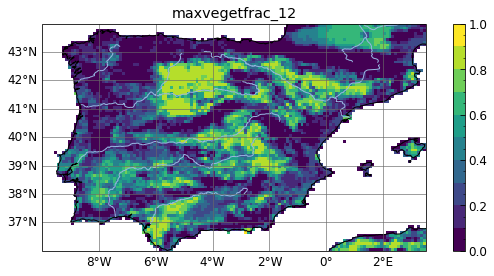

In [ ]:
#Display map of var for ds on restricted area
var='maxvegetfrac'
nb=11
ds = map

latmin=36.0
latmax=44
lonmin=-10
lonmax=3.5

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var][:,nb,:,:]

map_plotvar(plotvar, cmap=myvir,title=var+'_'+str(nb+1),vmin=0,vmax=1)


In [ ]:
def change_pfts(ds, lon_min, lon_max, lat_min, lat_max, var_name='maxvegetfrac', output_file='pftmap_new.nc'):
    ds = ds.copy()  # Ensure we don't modify the original dataset
    
    # Select the latitude and longitude range
    selected = ds[var_name].sel(lon=slice(lon_min, lon_max), lat=slice(lat_max, lat_min))

    # Set all k values to 0 in the selected region
    ds[var_name].loc[:,:, selected.lat, selected.lon] = 0
    
    # Set k=12 to 1 in the selected region
    ds[var_name].loc[:,12, selected.lat, selected.lon] = 1

    ds.to_netcdf(output_file)
    print(f"Dataset saved as {output_file}")

    return ds

In [ ]:
lonmin=0.5
lonmax=1.2
latmin=41.4
latmax=41.8
output_file='../../data/PFTmap_2014_new.nc'
# newds=change_pfts(map0, lonmin, lonmax, latmin, latmax, output_file=output_file)

In [ ]:
filename=output_file
map1=xr.open_dataset(filename, decode_times=False)
map1

<xarray.Dataset>
Dimensions:       (lat: 1800, lon: 3600, time_counter: 1, veget: 15)
Coordinates:
  * lat           (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon           (lon) float32 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
  * time_counter  (time_counter) float32 0.0
  * veget         (veget) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    maxvegetfrac  (time_counter, veget, lat, lon) float32 ...
Attributes: (12/19)
    description:  ORCHIDEE PFT map derived from ESACCI Land Cover map v2.0.7b...
    PFT1:         bare soil
    PFT2:         tropical broadleaf evergreen
    PFT3:         tropical broadleaf raingreen
    PFT4:         temperate needleleaf evergreen
    PFT5:         temperate broadleaf evergreen
    ...           ...
    PFT13:        C4 agriculture
    PFT14:        tropical C3 grass
    PFT15:        boreal C3 grass
    contact:      V.Bastrikov (vladislav.bastrikov@lsce.ipsl.fr), P.Peylin (p...
    web:          https://orchidas.lsce.ipsl.fr/dev/lccci/
    date:         27/12/2022 00:33

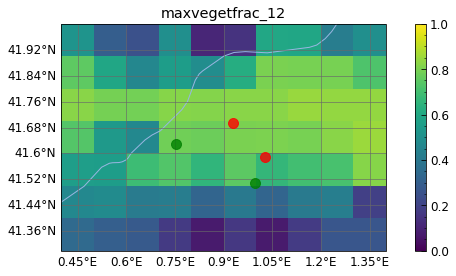

In [ ]:
#Display map of var for ds on restricted area
var='maxvegetfrac'
nb=11
ds = map

latmin=36.0
latmax=44
lonmin=-10
lonmax=3.5

latmin=41.35
latmax=42
lonmin=0.45
lonmax=1.35

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var][:,nb,:,:]

map_plotvar(plotvar, cmap='viridis',title=var+'_'+str(nb+1),vmin=0,vmax=1)
add_liaise_site_loc()

# Modify irrigmap

In [ ]:
def change_irrig(ds, newval, lon_min, lon_max, lat_min, lat_max, var_name='irrig', output_file='irrigmap_new.nc'):
    ds = ds.copy()  # Ensure we don't modify the original dataset
    
    # Select the latitude and longitude range
    selected = ds[var_name].sel(lon=slice(lon_min, lon_max), lat=slice(lat_max, lat_min))

    # Set all k values to 0 in the selected region
    ds[var_name].loc[selected.lat, selected.lon] = newval

    ds.to_netcdf(output_file)
    print(f"Dataset saved as {output_file}")

    return ds

In [ ]:
# filename='/data/ptiengou/PFTmap_2014.nc'
filename='../../data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped.nc'
irrmap0=xr.open_dataset(filename, decode_times=False)
irrmap=irrmap0

irrmap

<xarray.Dataset>
Dimensions:  (lat: 2160, lon: 4320)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
Data variables:
    irrig    (lat, lon) float32 ...
Attributes:
    Source:   HID data from Siebert et al. 2010, transformed for ORCHIDEE inp...
    history:  Tue Oct 22 17:35:54 2024: ncap2 -O -s where((lat < 36 || lat > ...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [ ]:
zero_lonmin, zero_lonmax = 0.9, 1.2
zero_latmin, zero_latmax = 41.4, 41.7
# zero_lonmin, zero_lonmax = 0.8, 1.2
# zero_latmin, zero_latmax = 41.4, 41.62
newval=0
output_file='../../data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped_new.nc'
newds=change_irrig(irrmap0, newval, zero_lonmin, zero_lonmax, zero_latmin, zero_latmax, output_file=output_file)


PermissionError: [Errno 13] Permission denied: b'/home/ptiengou/Documents/data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped_new.nc'

In [ ]:
hundred_lonmin, hundred_lonmax = 0.5, 0.9
hundred_latmin, hundred_latmax = 41.5, 41.8
# hundred_lonmin, hundred_lonmax = 0.8, 1.2
# hundred_latmin, hundred_latmax = 41.62, 41.85
newval=100
output_file='../../data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped_new.nc'
newds=change_irrig(newds, newval, hundred_lonmin, hundred_lonmax, hundred_latmin, hundred_latmax, output_file=output_file)

Dataset saved as ../../data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped_new.nc


In [ ]:
filename='../../data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped_new.nc'
irrmap1=xr.open_dataset(filename, decode_times=False)
irrmap1

<xarray.Dataset>
Dimensions:  (lat: 2160, lon: 4320)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
Data variables:
    irrig    (lat, lon) float32 ...
Attributes:
    Source:   HID data from Siebert et al. 2010, transformed for ORCHIDEE inp...
    history:  Tue Oct 22 17:35:54 2024: ncap2 -O -s where((lat < 36 || lat > ...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

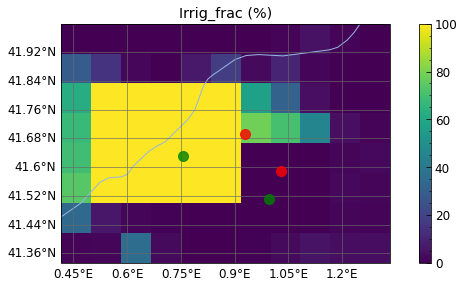

In [ ]:
#Display map of var for ds on restricted area
var='irrig'
ds = irrmap
ds=newds
ds=irrmap1

lat_min, lat_max, lon_min, lon_max = 41.35, 41.82, 0.45, 1.35  
# lat_min, lat_max, lon_min, lon_max = 41., 42., 0., 2.  
# lat_min, lat_max, lon_min, lon_max = 36.0, 44, -10, 3.5  

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var]

map_plotvar(plotvar, cmap='viridis',title='Irrig_frac (%)',vmin=0,vmax=100)
add_liaise_site_loc()